In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/LAB_mod_B/Project
import sys
print(sys.executable)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/LAB_mod_B/Project
/usr/bin/python3


# Importing libraries

In [2]:
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader, random_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from tqdm import tqdm

## Imporiting Data

In [3]:
# Custom Dataset
class TabularDataset(torch.utils.data.Dataset):
  def __init__(self, data_tensor):
    self.data = data_tensor

  def __len__(self):
    return self.data.shape[0]

  def __getitem__(self, index):
    return self.data[index], 0                              # dummy label for compatibility

# Load and preprocess CSV data
df = pd.read_csv("IT_NORD_VAE_input.csv")
df.drop('timestamp', axis=1, inplace=True)
print("Input Dataframe Dim:", df.shape)

data_tensor = torch.tensor(df.values, dtype=torch.float32)

# Split the dataset into train, val, test
dataset = TabularDataset(data_tensor)

total_size = len(dataset)
train_size = int(0.8 * total_size)                               # %80 training, %10 validation and %10 test
val_size = int(0.1 * total_size)
test_size = total_size - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(
    dataset,
    [train_size, val_size, test_size],
    generator=torch.Generator().manual_seed(42)
)

BATCH_SIZE = 128
train_loader = DataLoader(train_dataset, batch_size = BATCH_SIZE, shuffle = True)
val_loader = DataLoader(val_dataset, batch_size = BATCH_SIZE)
test_loader = DataLoader(test_dataset, batch_size = BATCH_SIZE)

Input Dataframe Dim: (8320, 126)


# Model Definition

In [4]:
class VariationalAutoEncoder(nn.Module):
  def __init__(self, input_dim, h_dim, z_dim):
    super().__init__()
    # encoder
    self.img_2hid = nn.Linear(input_dim, h_dim)
    self.hid_2mu = nn.Linear(h_dim, z_dim)
    self.hid_2sigma = nn.Linear(h_dim, z_dim)

    # decoder
    self.z_2hid = nn.Linear(z_dim, h_dim)
    self.hid_2img = nn.Linear(h_dim, input_dim)

    self.relu = nn.ReLU()                                 # activation func in hidden layers

  def encode(self, x):
    h = self.relu(self.img_2hid(x))
    mu, sigma = self.hid_2mu(h), self.hid_2sigma(h)
    return mu, sigma

  def decode(self, z):
    h = self.relu(self.z_2hid(z))
    return self.hid_2img(h)

  def forward(self, x):
    mu, sigma = self.encode(x)
    epsilon = torch.randn_like(sigma)
    z_new = mu + sigma*epsilon                            # reparameterization trick
    x_reconstructed = self.decode(z_new)
    return x_reconstructed, mu, sigma

# Training Process

The hyperparameters we need to specify the architecture and train the VAE are:
* `INPUT_DIM`: the dimension of the **input** for the encoder
* `H_DIM`: the dimension of the **hidden layers** for encoders and decoders
* `Z_DIM`: the dimension of the **latent space**
* `BATCH_SIZE`, `NUM_EPOCHS`, `LR_RATE`: optimization hyper-parameters


Training with Z_DIM = 2


Z_DIM = 2 | Epoch 1/50: 100%|██████████| 52/52 [00:00<00:00, 58.24it/s, kl_div=3.59, reconstruction_loss=101, total_loss=104]


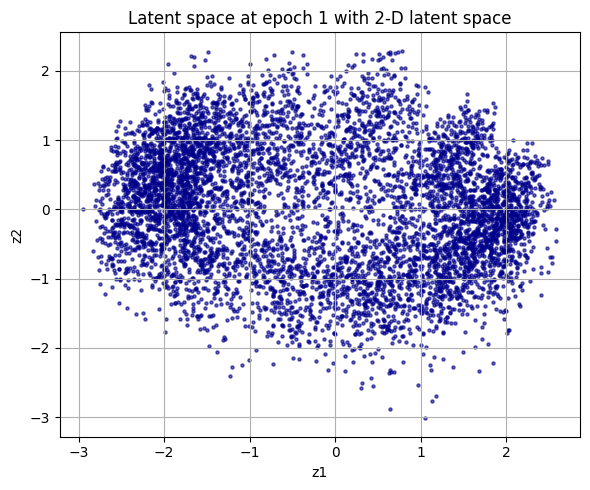

Z_DIM = 2 | Epoch 2/50: 100%|██████████| 52/52 [00:00<00:00, 149.47it/s, kl_div=4.38, reconstruction_loss=87, total_loss=91.4]
Z_DIM = 2 | Epoch 3/50: 100%|██████████| 52/52 [00:00<00:00, 148.37it/s, kl_div=4.56, reconstruction_loss=80, total_loss=84.5]
Z_DIM = 2 | Epoch 4/50: 100%|██████████| 52/52 [00:00<00:00, 154.53it/s, kl_div=4.46, reconstruction_loss=77.1, total_loss=81.6]
Z_DIM = 2 | Epoch 5/50: 100%|██████████| 52/52 [00:00<00:00, 218.42it/s, kl_div=4.68, reconstruction_loss=75.2, total_loss=79.9]
Z_DIM = 2 | Epoch 6/50: 100%|██████████| 52/52 [00:00<00:00, 186.62it/s, kl_div=4.69, reconstruction_loss=78.2, total_loss=82.9]


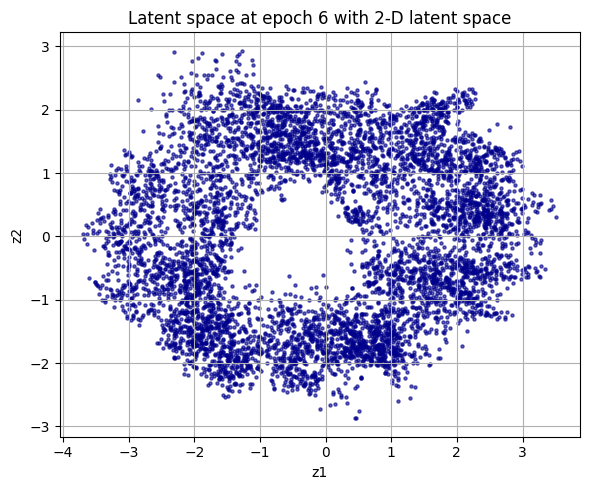

Z_DIM = 2 | Epoch 7/50: 100%|██████████| 52/52 [00:00<00:00, 141.99it/s, kl_div=5, reconstruction_loss=75.4, total_loss=80.4]
Z_DIM = 2 | Epoch 8/50: 100%|██████████| 52/52 [00:00<00:00, 168.22it/s, kl_div=5.04, reconstruction_loss=73.5, total_loss=78.5]
Z_DIM = 2 | Epoch 9/50: 100%|██████████| 52/52 [00:00<00:00, 153.01it/s, kl_div=4.85, reconstruction_loss=71.7, total_loss=76.5]
Z_DIM = 2 | Epoch 10/50: 100%|██████████| 52/52 [00:00<00:00, 132.39it/s, kl_div=5, reconstruction_loss=77.2, total_loss=82.2]
Z_DIM = 2 | Epoch 11/50: 100%|██████████| 52/52 [00:00<00:00, 206.75it/s, kl_div=5.7, reconstruction_loss=75.2, total_loss=80.9]


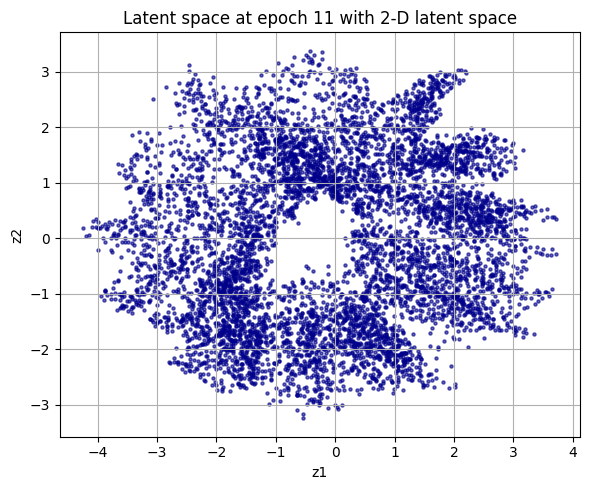

Z_DIM = 2 | Epoch 12/50: 100%|██████████| 52/52 [00:00<00:00, 143.67it/s, kl_div=5.9, reconstruction_loss=64.7, total_loss=70.6]
Z_DIM = 2 | Epoch 13/50: 100%|██████████| 52/52 [00:00<00:00, 217.17it/s, kl_div=5.29, reconstruction_loss=71.6, total_loss=76.9]
Z_DIM = 2 | Epoch 14/50: 100%|██████████| 52/52 [00:00<00:00, 213.84it/s, kl_div=5.73, reconstruction_loss=67.6, total_loss=73.3]
Z_DIM = 2 | Epoch 15/50: 100%|██████████| 52/52 [00:00<00:00, 153.25it/s, kl_div=5.14, reconstruction_loss=70.4, total_loss=75.6]
Z_DIM = 2 | Epoch 16/50: 100%|██████████| 52/52 [00:00<00:00, 159.22it/s, kl_div=5.57, reconstruction_loss=69.1, total_loss=74.7]


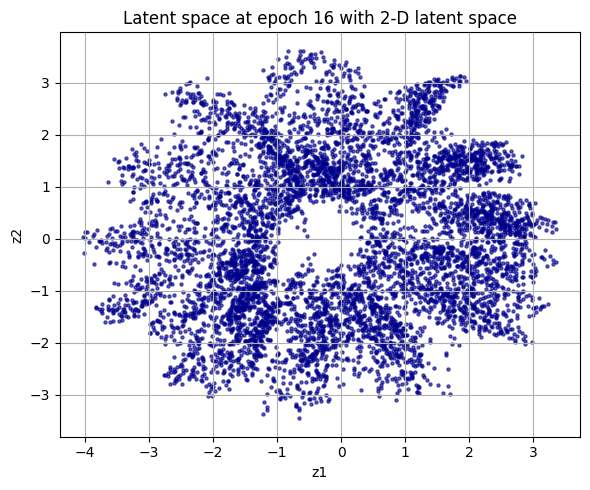

Z_DIM = 2 | Epoch 17/50: 100%|██████████| 52/52 [00:00<00:00, 152.11it/s, kl_div=5.28, reconstruction_loss=74.5, total_loss=79.7]
Z_DIM = 2 | Epoch 18/50: 100%|██████████| 52/52 [00:00<00:00, 160.10it/s, kl_div=5.73, reconstruction_loss=73.1, total_loss=78.8]
Z_DIM = 2 | Epoch 19/50: 100%|██████████| 52/52 [00:00<00:00, 157.54it/s, kl_div=5.33, reconstruction_loss=69, total_loss=74.4]
Z_DIM = 2 | Epoch 20/50: 100%|██████████| 52/52 [00:00<00:00, 141.48it/s, kl_div=5.52, reconstruction_loss=65.5, total_loss=71]
Z_DIM = 2 | Epoch 21/50: 100%|██████████| 52/52 [00:00<00:00, 130.79it/s, kl_div=5.59, reconstruction_loss=66.3, total_loss=71.9]


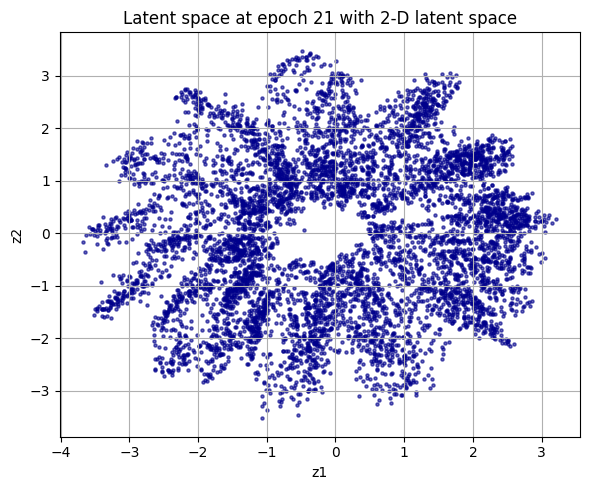

Z_DIM = 2 | Epoch 22/50: 100%|██████████| 52/52 [00:00<00:00, 118.74it/s, kl_div=5.45, reconstruction_loss=73.8, total_loss=79.2]
Z_DIM = 2 | Epoch 23/50: 100%|██████████| 52/52 [00:00<00:00, 139.78it/s, kl_div=5.66, reconstruction_loss=71.2, total_loss=76.9]
Z_DIM = 2 | Epoch 24/50: 100%|██████████| 52/52 [00:00<00:00, 127.07it/s, kl_div=5.82, reconstruction_loss=66.8, total_loss=72.6]
Z_DIM = 2 | Epoch 25/50: 100%|██████████| 52/52 [00:00<00:00, 116.74it/s, kl_div=5.82, reconstruction_loss=68.1, total_loss=73.9]
Z_DIM = 2 | Epoch 26/50: 100%|██████████| 52/52 [00:00<00:00, 155.65it/s, kl_div=5.72, reconstruction_loss=68.8, total_loss=74.5]


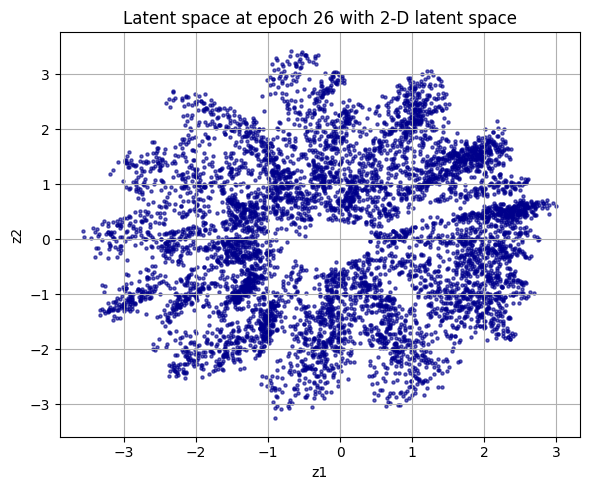

Z_DIM = 2 | Epoch 27/50: 100%|██████████| 52/52 [00:00<00:00, 119.55it/s, kl_div=5.2, reconstruction_loss=69, total_loss=74.2]
Z_DIM = 2 | Epoch 28/50: 100%|██████████| 52/52 [00:00<00:00, 143.09it/s, kl_div=5.43, reconstruction_loss=65.8, total_loss=71.3]
Z_DIM = 2 | Epoch 29/50: 100%|██████████| 52/52 [00:00<00:00, 125.55it/s, kl_div=5.13, reconstruction_loss=67.6, total_loss=72.7]
Z_DIM = 2 | Epoch 30/50: 100%|██████████| 52/52 [00:00<00:00, 190.60it/s, kl_div=5.57, reconstruction_loss=71.3, total_loss=76.9]
Z_DIM = 2 | Epoch 31/50: 100%|██████████| 52/52 [00:00<00:00, 192.24it/s, kl_div=5.62, reconstruction_loss=66.4, total_loss=72]


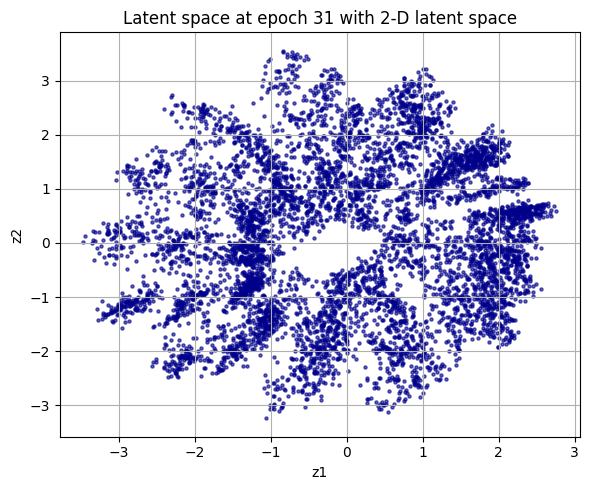

Z_DIM = 2 | Epoch 32/50: 100%|██████████| 52/52 [00:00<00:00, 187.52it/s, kl_div=5.61, reconstruction_loss=70.6, total_loss=76.3]
Z_DIM = 2 | Epoch 33/50: 100%|██████████| 52/52 [00:00<00:00, 162.86it/s, kl_div=5.72, reconstruction_loss=64.7, total_loss=70.4]
Z_DIM = 2 | Epoch 34/50: 100%|██████████| 52/52 [00:00<00:00, 134.89it/s, kl_div=5.73, reconstruction_loss=62.9, total_loss=68.6]
Z_DIM = 2 | Epoch 35/50: 100%|██████████| 52/52 [00:00<00:00, 119.38it/s, kl_div=5.54, reconstruction_loss=62.9, total_loss=68.5]
Z_DIM = 2 | Epoch 36/50: 100%|██████████| 52/52 [00:00<00:00, 160.52it/s, kl_div=5.32, reconstruction_loss=63.3, total_loss=68.6]


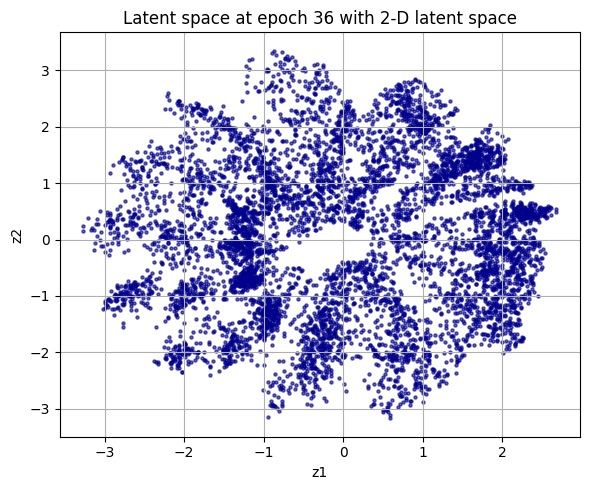

Z_DIM = 2 | Epoch 37/50: 100%|██████████| 52/52 [00:00<00:00, 131.49it/s, kl_div=5.51, reconstruction_loss=64.1, total_loss=69.6]
Z_DIM = 2 | Epoch 38/50: 100%|██████████| 52/52 [00:00<00:00, 134.25it/s, kl_div=5.57, reconstruction_loss=64, total_loss=69.6]
Z_DIM = 2 | Epoch 39/50: 100%|██████████| 52/52 [00:00<00:00, 144.79it/s, kl_div=5.64, reconstruction_loss=65.8, total_loss=71.5]
Z_DIM = 2 | Epoch 40/50: 100%|██████████| 52/52 [00:00<00:00, 146.02it/s, kl_div=5.26, reconstruction_loss=61.9, total_loss=67.2]
Z_DIM = 2 | Epoch 41/50: 100%|██████████| 52/52 [00:00<00:00, 178.37it/s, kl_div=5.44, reconstruction_loss=65.7, total_loss=71.2]


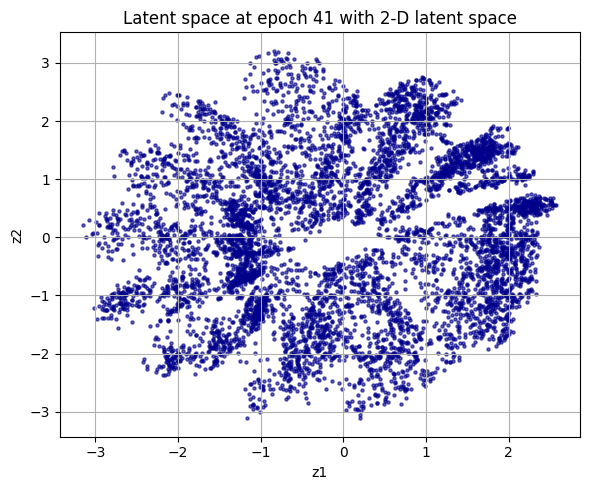

Z_DIM = 2 | Epoch 42/50: 100%|██████████| 52/52 [00:00<00:00, 150.43it/s, kl_div=5.26, reconstruction_loss=65.7, total_loss=71]
Z_DIM = 2 | Epoch 43/50: 100%|██████████| 52/52 [00:00<00:00, 165.52it/s, kl_div=5.17, reconstruction_loss=64.9, total_loss=70.1]
Z_DIM = 2 | Epoch 44/50: 100%|██████████| 52/52 [00:00<00:00, 167.48it/s, kl_div=5.29, reconstruction_loss=64.4, total_loss=69.7]
Z_DIM = 2 | Epoch 45/50: 100%|██████████| 52/52 [00:00<00:00, 144.70it/s, kl_div=5, reconstruction_loss=69.5, total_loss=74.5]
Z_DIM = 2 | Epoch 46/50: 100%|██████████| 52/52 [00:00<00:00, 171.34it/s, kl_div=5.14, reconstruction_loss=70.1, total_loss=75.3]


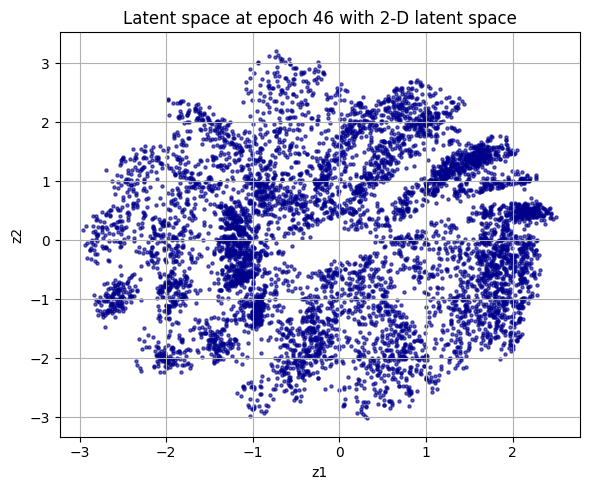

Z_DIM = 2 | Epoch 47/50: 100%|██████████| 52/52 [00:00<00:00, 182.29it/s, kl_div=5.39, reconstruction_loss=65, total_loss=70.4]
Z_DIM = 2 | Epoch 48/50: 100%|██████████| 52/52 [00:00<00:00, 209.21it/s, kl_div=5.08, reconstruction_loss=66.7, total_loss=71.8]
Z_DIM = 2 | Epoch 49/50: 100%|██████████| 52/52 [00:00<00:00, 154.93it/s, kl_div=5.29, reconstruction_loss=62.4, total_loss=67.6]
Z_DIM = 2 | Epoch 50/50: 100%|██████████| 52/52 [00:00<00:00, 133.09it/s, kl_div=5.04, reconstruction_loss=66.3, total_loss=71.3]


Final Test Loss for Z_DIM = 2: 70.4107

Training with Z_DIM = 5


Z_DIM = 5 | Epoch 1/50: 100%|██████████| 52/52 [00:00<00:00, 136.89it/s, kl_div=5.41, reconstruction_loss=95.7, total_loss=101]
Z_DIM = 5 | Epoch 2/50: 100%|██████████| 52/52 [00:00<00:00, 149.69it/s, kl_div=8.6, reconstruction_loss=62.7, total_loss=71.3]
Z_DIM = 5 | Epoch 3/50: 100%|██████████| 52/52 [00:00<00:00, 193.15it/s, kl_div=9.53, reconstruction_loss=57.5, total_loss=67]
Z_DIM = 5 | Epoch 4/50: 100%|██████████| 52/52 [00:00<00:00, 174.06it/s, kl_div=10.2, reconstruction_loss=52.8, total_loss=63]
Z_DIM = 5 | Epoch 5/50: 100%|██████████| 52/52 [00:00<00:00, 125.80it/s, kl_div=9.81, reconstruction_loss=50.9, total_loss=60.7]
Z_DIM = 5 | Epoch 6/50: 100%|██████████| 52/52 [00:00<00:00, 138.00it/s, kl_div=9.93, reconstruction_loss=51.5, total_loss=61.4]
Z_DIM = 5 | Epoch 7/50: 100%|██████████| 52/52 [00:00<00:00, 111.63it/s, kl_div=10.5, reconstruction_loss=45.6, total_loss=56.1]
Z_DIM = 5 | Epoch 8/50: 100%|██████████| 52/52 [00:00<00:00, 161.39it/s, kl_div=9.77, reconstruction_lo

Final Test Loss for Z_DIM = 5: 35.2830

Training with Z_DIM = 8


Z_DIM = 8 | Epoch 1/50: 100%|██████████| 52/52 [00:00<00:00, 160.72it/s, kl_div=7.16, reconstruction_loss=91, total_loss=98.2]
Z_DIM = 8 | Epoch 2/50: 100%|██████████| 52/52 [00:00<00:00, 233.62it/s, kl_div=9.84, reconstruction_loss=68.2, total_loss=78]
Z_DIM = 8 | Epoch 3/50: 100%|██████████| 52/52 [00:00<00:00, 234.23it/s, kl_div=12.2, reconstruction_loss=46, total_loss=58.2]
Z_DIM = 8 | Epoch 4/50: 100%|██████████| 52/52 [00:00<00:00, 138.59it/s, kl_div=14.3, reconstruction_loss=48.6, total_loss=62.8]
Z_DIM = 8 | Epoch 5/50: 100%|██████████| 52/52 [00:00<00:00, 117.37it/s, kl_div=14.1, reconstruction_loss=38.5, total_loss=52.6]
Z_DIM = 8 | Epoch 6/50: 100%|██████████| 52/52 [00:00<00:00, 130.88it/s, kl_div=14.8, reconstruction_loss=30.9, total_loss=45.7]
Z_DIM = 8 | Epoch 7/50: 100%|██████████| 52/52 [00:00<00:00, 162.70it/s, kl_div=14.8, reconstruction_loss=30, total_loss=44.8]
Z_DIM = 8 | Epoch 8/50: 100%|██████████| 52/52 [00:00<00:00, 138.50it/s, kl_div=14.9, reconstruction_loss

Final Test Loss for Z_DIM = 8: 30.0965

Training with Z_DIM = 11


Z_DIM = 11 | Epoch 1/50: 100%|██████████| 52/52 [00:00<00:00, 129.76it/s, kl_div=7.43, reconstruction_loss=91.6, total_loss=99.1]
Z_DIM = 11 | Epoch 2/50: 100%|██████████| 52/52 [00:00<00:00, 125.86it/s, kl_div=10.5, reconstruction_loss=55.1, total_loss=65.6]
Z_DIM = 11 | Epoch 3/50: 100%|██████████| 52/52 [00:00<00:00, 113.03it/s, kl_div=14.7, reconstruction_loss=39.8, total_loss=54.6]
Z_DIM = 11 | Epoch 4/50: 100%|██████████| 52/52 [00:00<00:00, 147.43it/s, kl_div=15.8, reconstruction_loss=36, total_loss=51.8]
Z_DIM = 11 | Epoch 5/50: 100%|██████████| 52/52 [00:00<00:00, 155.61it/s, kl_div=16.8, reconstruction_loss=27.5, total_loss=44.3]
Z_DIM = 11 | Epoch 6/50: 100%|██████████| 52/52 [00:00<00:00, 187.15it/s, kl_div=15.9, reconstruction_loss=27.5, total_loss=43.4]
Z_DIM = 11 | Epoch 7/50: 100%|██████████| 52/52 [00:00<00:00, 134.38it/s, kl_div=16, reconstruction_loss=23.6, total_loss=39.6]
Z_DIM = 11 | Epoch 8/50: 100%|██████████| 52/52 [00:00<00:00, 136.11it/s, kl_div=15.8, reconst

Final Test Loss for Z_DIM = 11: 27.9562

Training with Z_DIM = 15


Z_DIM = 15 | Epoch 1/50: 100%|██████████| 52/52 [00:00<00:00, 135.98it/s, kl_div=12, reconstruction_loss=98.5, total_loss=111]
Z_DIM = 15 | Epoch 2/50: 100%|██████████| 52/52 [00:00<00:00, 137.41it/s, kl_div=13.1, reconstruction_loss=61.6, total_loss=74.7]
Z_DIM = 15 | Epoch 3/50: 100%|██████████| 52/52 [00:00<00:00, 147.48it/s, kl_div=17, reconstruction_loss=39.2, total_loss=56.2]
Z_DIM = 15 | Epoch 4/50: 100%|██████████| 52/52 [00:00<00:00, 131.57it/s, kl_div=18.8, reconstruction_loss=34.5, total_loss=53.4]
Z_DIM = 15 | Epoch 5/50: 100%|██████████| 52/52 [00:00<00:00, 167.93it/s, kl_div=18.1, reconstruction_loss=28.5, total_loss=46.6]
Z_DIM = 15 | Epoch 6/50: 100%|██████████| 52/52 [00:00<00:00, 153.93it/s, kl_div=19.7, reconstruction_loss=25.1, total_loss=44.8]
Z_DIM = 15 | Epoch 7/50: 100%|██████████| 52/52 [00:00<00:00, 129.78it/s, kl_div=18.7, reconstruction_loss=22.9, total_loss=41.6]
Z_DIM = 15 | Epoch 8/50: 100%|██████████| 52/52 [00:00<00:00, 135.37it/s, kl_div=19, reconstruc

Final Test Loss for Z_DIM = 15: 29.1982


In [5]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

INPUT_DIM = data_tensor.shape[1]
H_DIM = 64
NUM_EPOCHS = 50
BATCH_SIZE = 128
LR_RATE = 1e-3
Z_DIM_VALUES = [2, 5, 8, 11, 15]

all_histories = {}

for Z_DIM in Z_DIM_VALUES:
  print(f"\nTraining with Z_DIM = {Z_DIM}")
  model = VariationalAutoEncoder(INPUT_DIM, H_DIM, Z_DIM).to(DEVICE)
  optimizer = optim.Adam(model.parameters(), lr=LR_RATE)
  loss_fn = nn.MSELoss(reduction="sum")

  history = {
      'total_loss': [],
      'reconstruction_loss': [],
      'kl_div': [],
      'val_total_loss': [],
      'val_reconstruction_loss': [],
      'val_kl_div': [],
      'test_loss': None
  }
  outputs = []

  for epoch in range(NUM_EPOCHS):
    epoch_total = 0
    epoch_recon = 0
    epoch_kl = 0
    num_samples = 0

    model.train()
    loop = tqdm(train_loader, desc=f"Z_DIM = {Z_DIM} | Epoch {epoch+1}/{NUM_EPOCHS}")

    for i, (x_batch, _) in enumerate(loop):
      x_batch = x_batch.to(DEVICE)
      x_reconstructed, mu, sigma = model(x_batch)

      # Loss Function
      reconstruction_loss = loss_fn(x_reconstructed, x_batch)
      logvar = torch.log(sigma.pow(2) + 1e-8)
      kl_div = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
      loss = reconstruction_loss + kl_div

      # Backpropagation
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      loop.set_postfix(
          total_loss=loss.item() / x_batch.shape[0],
          reconstruction_loss=reconstruction_loss.item() / x_batch.shape[0],
          kl_div=kl_div.item() / x_batch.shape[0])

      epoch_total += loss.item()
      epoch_recon += reconstruction_loss.item()
      epoch_kl += kl_div.item()
      num_samples += x_batch.shape[0]

      if i == 0:
        outputs.append((epoch, x_batch.clone(), x_reconstructed.clone()))

    # Compute and store averages after each epoch
    history['total_loss'].append(epoch_total / num_samples)
    history['reconstruction_loss'].append(epoch_recon / num_samples)
    history['kl_div'].append(epoch_kl / num_samples)

    # Validation step
    model.eval()
    val_total = 0
    val_recon = 0
    val_kl = 0
    val_samples = 0

    with torch.no_grad():
      for x_val, _ in val_loader:
        x_val = x_val.to(DEVICE)
        x_reconstructed, mu, sigma = model(x_val)
        loss_rec = loss_fn(x_reconstructed, x_val)
        logvar = torch.log(sigma.pow(2) + 1e-8)
        kl_div = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
        loss = loss_rec + kl_div

        val_total += loss.item()
        val_recon += loss_rec.item()
        val_kl += kl_div.item()
        val_samples += x_val.size(0)

    history['val_total_loss'].append(val_total / val_samples)
    history['val_reconstruction_loss'].append(val_recon / val_samples)
    history['val_kl_div'].append(val_kl / val_samples)

    # Visualize latent space every 5 epochs (only for Z_DIM = 2)
    if epoch % 5 == 0 and Z_DIM == 2:
      model.eval()
      with torch.no_grad():
        zs = []
        for x_batch, _ in train_loader:
          x_batch = x_batch.to(DEVICE)
          mu, sigma = model.encode(x_batch)
          zs.append(mu.cpu().numpy())

        zs = np.concatenate(zs, axis=0)

        plt.figure(figsize=(6, 5))
        scatter = plt.scatter(zs[:, 0], zs[:, 1], color='darkblue', alpha=0.6, s=5)
        plt.title(f"Latent space at epoch {epoch + 1} with {Z_DIM}-D latent space")
        plt.xlabel("z1")
        plt.ylabel("z2")
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        plt.close()

  # Final test set evaluation
  model.eval()
  test_loss = 0
  test_samples = 0
  with torch.no_grad():
    for x_test, _ in test_loader:
      x_test = x_test.to(DEVICE)
      x_reconstructed, mu, sigma = model(x_test)
      loss_rec = loss_fn(x_reconstructed, x_test)
      logvar = torch.log(sigma.pow(2) + 1e-8)
      kl_div = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
      loss = loss_rec + kl_div
      test_loss += loss.item()
      test_samples += x_test.shape[0]

  history['test_loss'] = test_loss / test_samples
  print(f"Final Test Loss for Z_DIM = {Z_DIM}: {history['test_loss']:.4f}")

  all_histories[Z_DIM] = history

In [6]:
print("Original min/max:", torch.min(x_batch), torch.max(x_batch))
print("Reconstructed min/max:", torch.min(x_reconstructed), torch.max(x_reconstructed))

Original min/max: tensor(-1.8011) tensor(5.6077)
Reconstructed min/max: tensor(-1.8616) tensor(4.9175)


These limit of the input may explain why the VAE produces values "positive-shifted"

## Plot

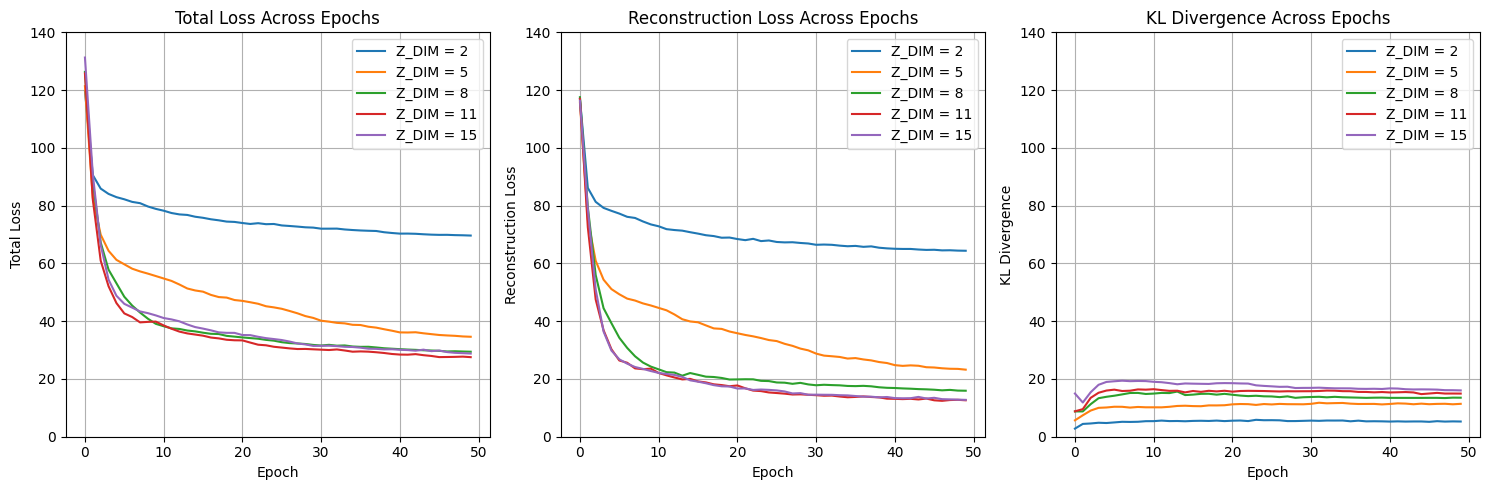

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharex=False)
ymin, ymax = 0, 140

# Plot of Total Loss
for z_dim, history in all_histories.items():
  axs[0].plot(history['total_loss'], label=f"Z_DIM = {z_dim}")
  axs[0].set_ylabel("Total Loss")
  axs[0].set_xlabel("Epoch")
  axs[0].set_title("Total Loss Across Epochs")
  axs[0].set_ylim(ymin, ymax)
  axs[0].legend()
  axs[0].grid(True)

# Plot of Reconstruction Loss
for z_dim, history in all_histories.items():
  axs[1].plot(history['reconstruction_loss'], label=f"Z_DIM = {z_dim}")
  axs[1].set_ylabel("Reconstruction Loss")
  axs[1].set_xlabel("Epoch")
  axs[1].set_title("Reconstruction Loss Across Epochs")
  axs[1].set_ylim(ymin, ymax)
  axs[1].legend()
  axs[1].grid(True)

# Plot of KL Divergence
for z_dim, history in all_histories.items():
  axs[2].plot(history['kl_div'], label=f"Z_DIM = {z_dim}")
  axs[2].set_xlabel("Epoch")
  axs[2].set_ylabel("KL Divergence")
  axs[2].set_title("KL Divergence Across Epochs")
  axs[2].set_ylim(ymin, ymax)
  axs[2].legend()
  axs[2].grid(True)

plt.tight_layout()
plt.show()

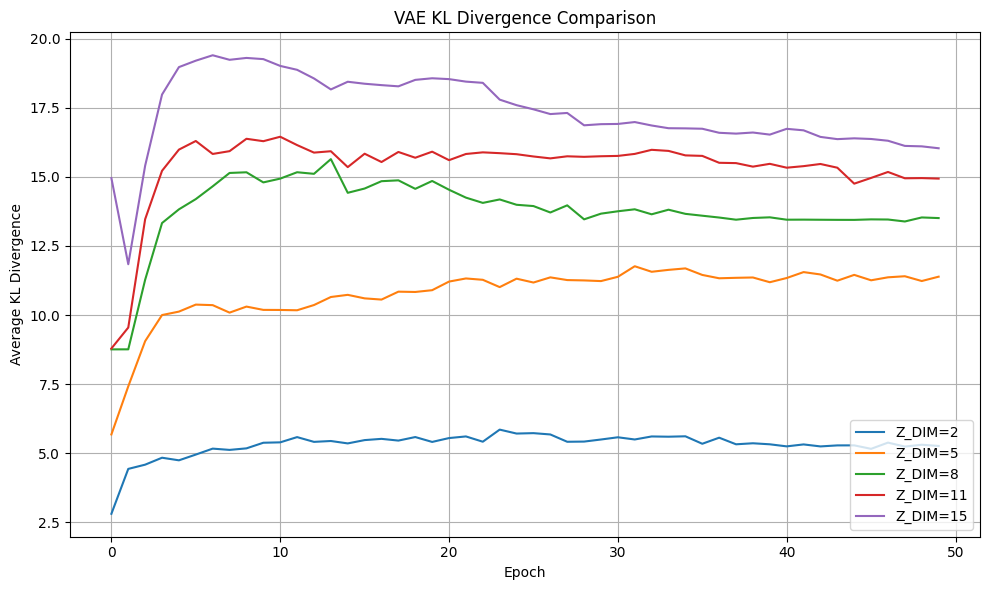

In [13]:
# (better) Plot of KL Divergence

plt.figure(figsize=(10, 6))
for Z_DIM, history in all_histories.items():
  plt.plot(history['kl_div'], label=f"Z_DIM={Z_DIM}")
  plt.xlabel("Epoch")
  plt.ylabel("Average KL Divergence")
  plt.title("VAE KL Divergence Comparison")
  plt.legend(loc='lower right')
  plt.grid(True)
  plt.tight_layout()
  plt.show()

In [9]:
print(f"{'Z_DIM':<8} {'Total Loss':<13} {'Recon Loss':<13} {'KL-Divergence':<13}")
for z_dim, history in all_histories.items():
  print(f"{z_dim:<8} {history['total_loss'][-1]:<13.2f} {history['reconstruction_loss'][-1]:<13.2f} {history['kl_div'][-1]:<13.2f}")

Z_DIM    Total Loss    Recon Loss    KL-Divergence
2        69.64         64.38         5.26         
5        34.60         23.22         11.39        
8        29.43         15.92         13.51        
11       27.55         12.61         14.94        
15       28.79         12.76         16.03        


Original vs Reconstructed for Z_DIM = 15


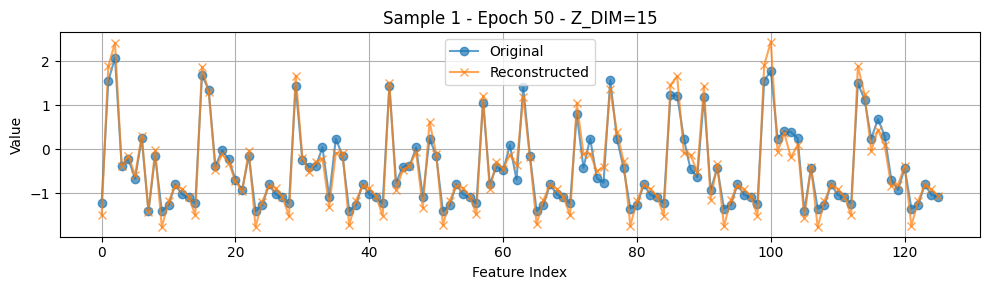

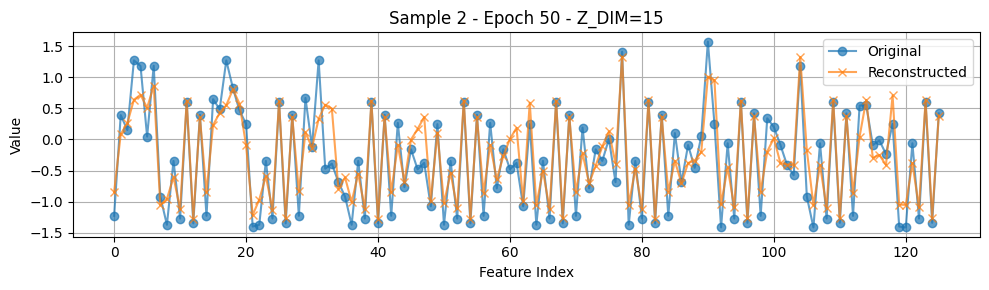

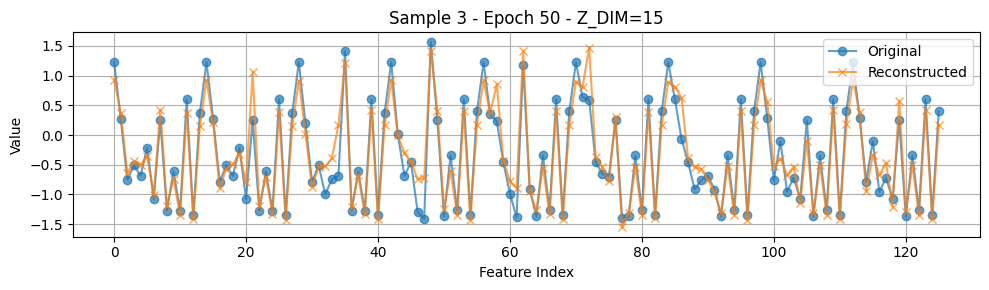

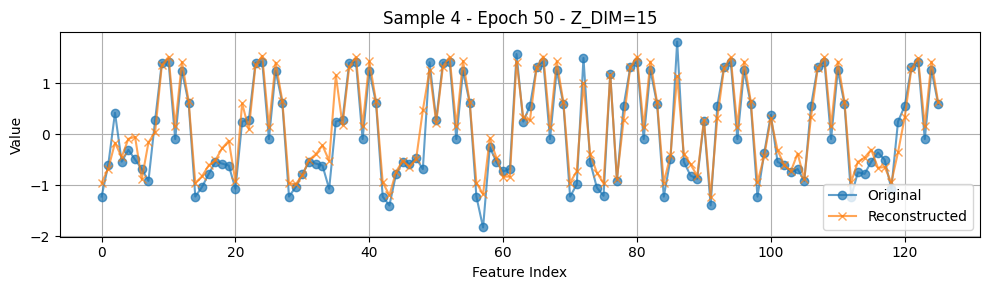

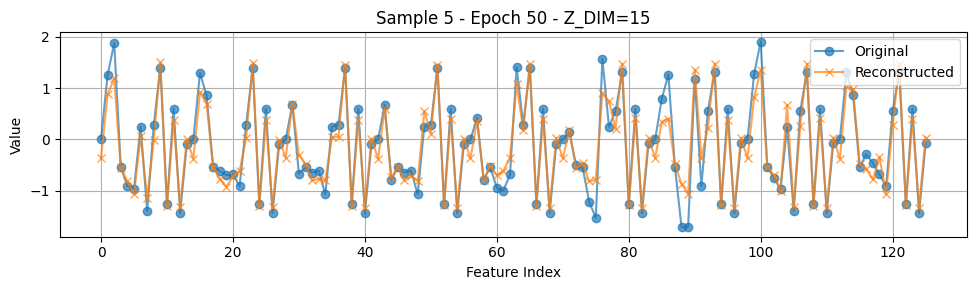

In [10]:
# Plot Original vs Reconstructed Data

print(f"Original vs Reconstructed for Z_DIM = {Z_DIM}")
model.eval()
with torch.no_grad():
  epoch_idx, x_orig, x_recon = outputs[-1]
  x_orig = x_orig.cpu().numpy()
  x_recon = x_recon.cpu().numpy()

  num_features = x_orig.shape[1]
  num_samples = min(5, x_orig.shape[0])

  for i in range(num_samples):
    plt.figure(figsize=(10, 3))
    plt.plot(range(num_features), x_orig[i], label='Original', marker='o', alpha=0.7)
    plt.plot(range(num_features), x_recon[i], label='Reconstructed', marker='x', alpha=0.7)
    plt.title(f"Sample {i+1} - Epoch {epoch_idx+1} - Z_DIM={Z_DIM}")
    plt.xlabel("Feature Index")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    plt.close()

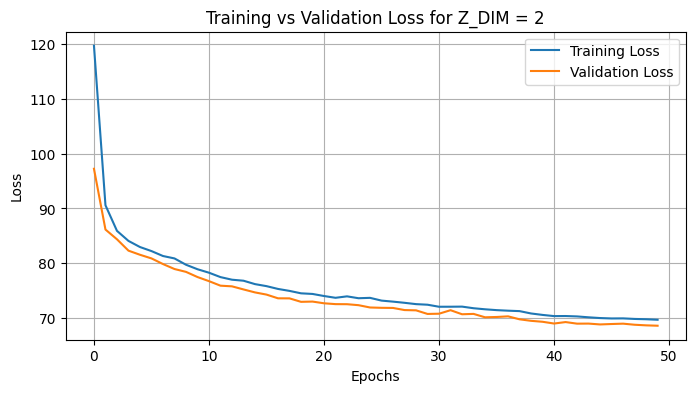

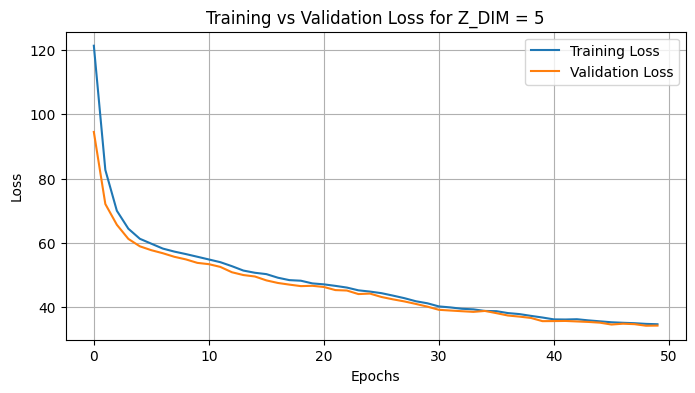

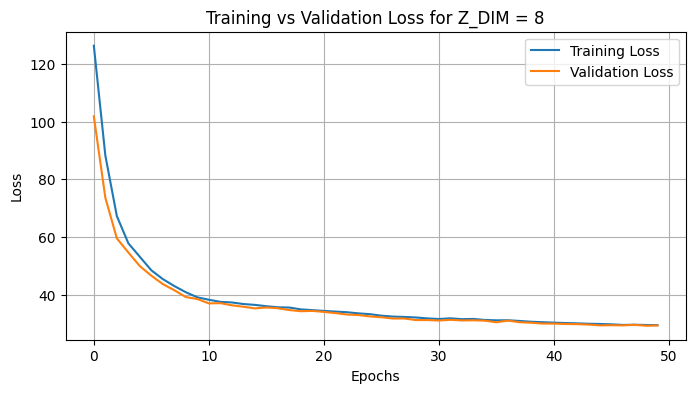

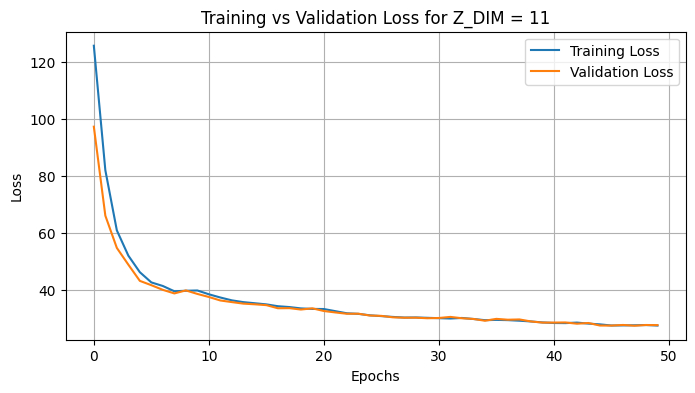

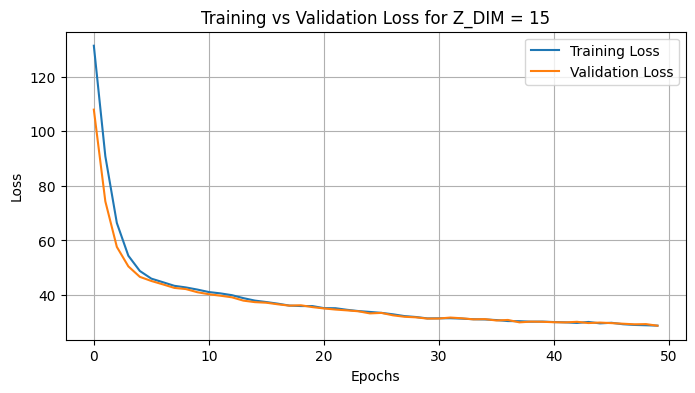

In [11]:
# Total Loss (train vs. validation)

for Z_DIM in Z_DIM_VALUES:
  history = all_histories[Z_DIM]

  plt.figure(figsize=(8, 4))
  plt.plot(history['total_loss'], label="Training Loss")
  plt.plot(history['val_total_loss'], label="Validation Loss")
  plt.title(f"Training vs Validation Loss for Z_DIM = {Z_DIM}")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.grid(True)
  plt.show()

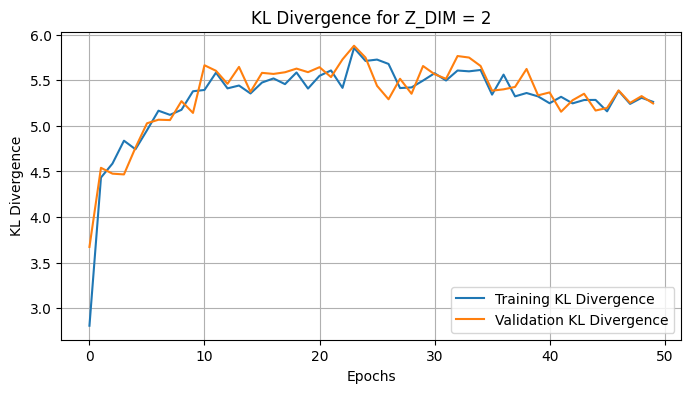

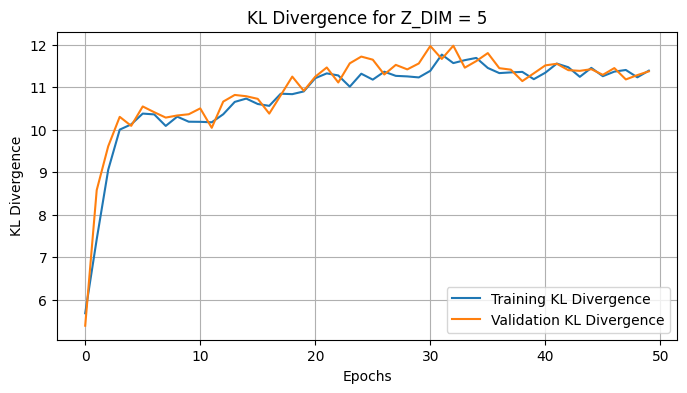

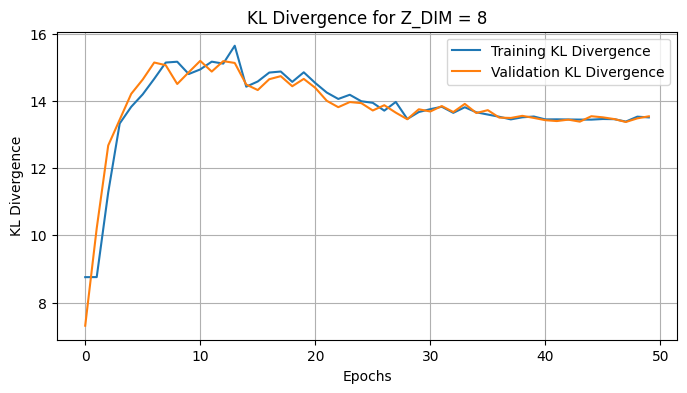

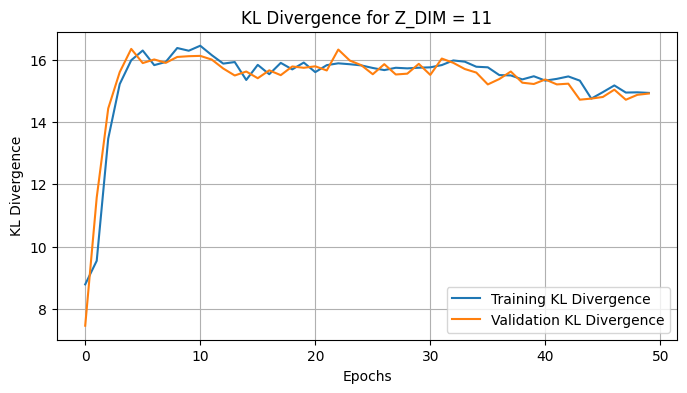

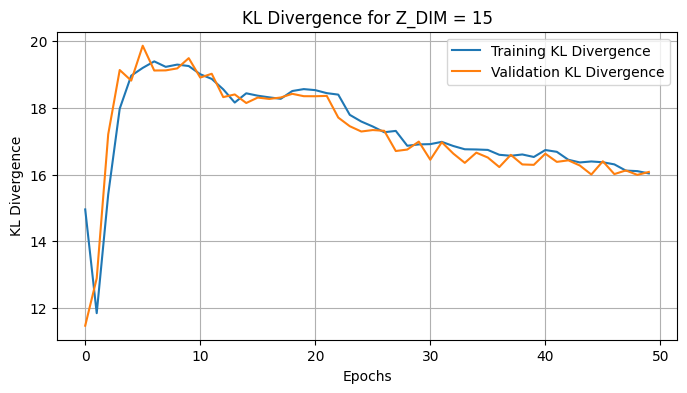

In [12]:
# KL Divergence (train vs. validation)

for Z_DIM in Z_DIM_VALUES:
  history = all_histories[Z_DIM]

  plt.figure(figsize=(8, 4))
  plt.plot(history['kl_div'], label="Training KL Divergence")
  plt.plot(history['val_kl_div'], label="Validation KL Divergence")
  plt.title(f"KL Divergence for Z_DIM = {Z_DIM}")
  plt.xlabel("Epochs")
  plt.ylabel("KL Divergence")
  plt.legend()
  plt.grid(True)
  plt.show()